# PHYS-E0412 Computational Physics :: Homework 11
Ari Viitala 432568

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [123]:
N = 1000
h = 1 / (N - 1)
x = np.linspace(0,1, N)
u0 = 1.831 * np.exp(-10 * (x - 0.5)**2)
t_steps = 100
time = np.linspace(0, 0.1, 100)[1:]
t_h = time[1] - time[0]

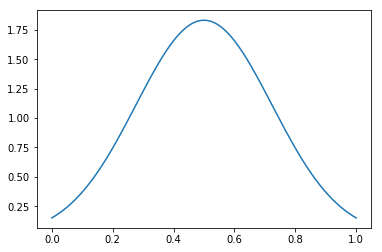

In [124]:
plt.plot(x, u0)
plt.show()

In [125]:
stencil =  1 / h**2 * (2 * np.eye(N) - np.diag(np.ones(N-1), 1) - np.diag(np.ones(N-1), -1))  
#stencil[0] = 0
#stencil[-1] = 0
#stencil[0, 0] = 1
#stencil[-1, -1] = 1

In [126]:
stencil

array([[ 1996002.,  -998001.,        0., ...,        0.,        0.,
               0.],
       [ -998001.,  1996002.,  -998001., ...,        0.,        0.,
               0.],
       [       0.,  -998001.,  1996002., ...,        0.,        0.,
               0.],
       ..., 
       [       0.,        0.,        0., ...,  1996002.,  -998001.,
               0.],
       [       0.,        0.,        0., ...,  -998001.,  1996002.,
         -998001.],
       [       0.,        0.,        0., ...,        0.,  -998001.,
         1996002.]])

In [127]:
u = [u0]
for i, t in enumerate(time):
    u1 = np.linalg.solve(np.eye(N) + t_h * stencil, u[i])
    u.append(u1)

In [128]:
u = np.array(u)

In [129]:
u.shape

(100, 1000)

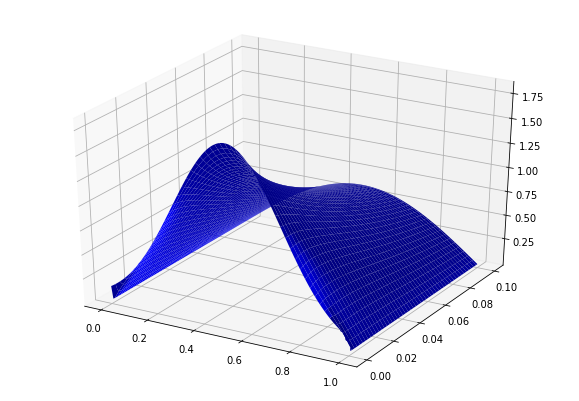

In [130]:
fig = plt.figure(1, (10, 7)) 
ax = fig.add_subplot(111, projection='3d') 

time_ax = [0] + list(time)
X, Y = np.meshgrid(x, time_ax) # Plot the surface 
ax.plot_surface(X, Y, u, color='b') 
plt.show() 


In [160]:
u_cn = [u0]
first = np.linalg.solve(np.eye(N) + 0.5 * t_h * stencil, np.eye(N))
second = np.eye(N) + 0.5 * t_h * stencil
m = first * second
for i, t in enumerate(time):
    u1 = m.dot(u[i])
    u_cn.append(u1)
    
u_cn = np.array(u_cn)

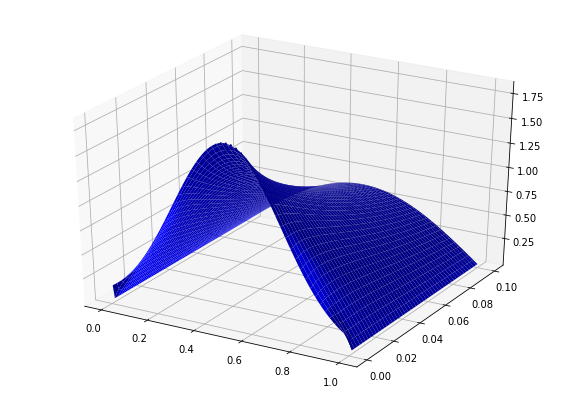

In [161]:
fig = plt.figure(1, (10, 7)) 
ax = fig.add_subplot(111, projection='3d') 

time_ax = [0] + list(time)
X, Y = np.meshgrid(x, time_ax) # Plot the surface 
ax.plot_surface(X, Y, u_cn, color='b') 
plt.show() 

In [162]:
u_cn_r = [u_cn[-1]]
first = np.linalg.solve(np.eye(N) + 0.5 * t_h * stencil, np.eye(N))
second = np.eye(N) + 0.5 * t_h * stencil
m = first * second
for i, t in enumerate(time):
    u1 = m.dot(u_cn_r[i])
    u_cn_r.append(u1)
    
u_cn_r = np.array(u_cn_r)

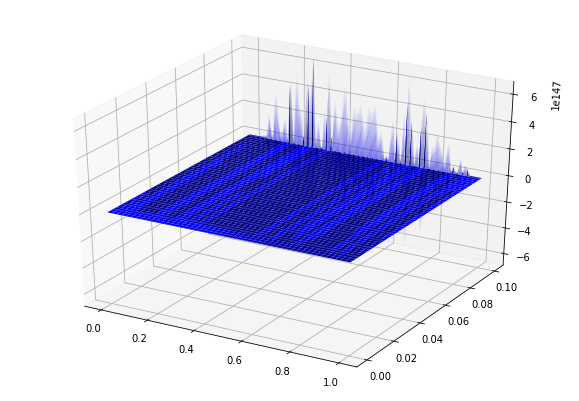

In [163]:
fig = plt.figure(1, (10, 7)) 
ax = fig.add_subplot(111, projection='3d') 

time_ax = [0] + list(time)
X, Y = np.meshgrid(x, time_ax) # Plot the surface 
ax.plot_surface(X, Y, u_cn_r, color='b') 
plt.show() 